In [2]:
#importando a biblioteca
import pandas as pd

In [3]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#Ver a cabeça de cada Excel
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Amostra de 5 linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
107,Recife,2019-01-01,15.40,980,7
44,Aracaju,2018-01-01,11.42,1520,5
27,Aracaju,2018-01-01,3.39,1523,4
22,Aracaju,2018-01-01,150.94,1522,1
42,Salvador,2019-01-01,44.28,1034,1


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [5]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consulta linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"]).mean(), inplace=True)

SyntaxError: ignored

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Verifica e média dos valores de venda
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)
df.dropna(subset=["Vendas"], inplace=True)

In [6]:
#Calculando a receita (Vendas x Quantidade)
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando as 3 lojas com maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#Retornando as 3 lojas com menor receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupamento de receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados por Receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,1552867200000000000,886.0,853,4,3544.0
55,Natal,1546905600000000000,859.0,854,4,3436.0
51,Natal,1516492800000000000,859.0,852,4,3436.0
30,Natal,1538438400000000000,856.0,853,4,3424.0
41,Natal,1526774400000000000,835.0,852,4,3340.0
38,Natal,1519516800000000000,828.0,852,4,3312.0
10,Natal,1540598400000000000,828.0,852,4,3312.0
69,Natal,1553385600000000000,817.0,852,4,3268.0
62,Natal,1518220800000000000,793.0,854,4,3172.0
52,Natal,1524787200000000000,778.0,854,4,3112.0


In [ ]:
#Passar data para int
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [7]:
#Passar data para formato de data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#Conferindo o formato de data se está ok
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [8]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
52,Recife,2019-01-01,11.87,981,6,71.22,2019
96,Aracaju,2018-01-01,85.92,1521,2,171.84,2018
84,Natal,2019-01-02,22.99,1036,1,22.99,2019
129,Aracaju,2018-01-01,13.70,1522,6,82.20,2018
70,Salvador,2019-01-01,39.06,1034,3,117.18,2019


In [9]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,3,2
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,1,1
84,Aracaju,2018-01-01,40.98,1520,5,204.90,2018,1,1
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,2018,1,1
124,Aracaju,2018-01-01,139.64,1522,5,698.20,2018,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [10]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
162,Salvador,2019-01-02,23.08,1036,2,46.16,2019,1,2,366 days
233,Salvador,2019-01-03,172.40,1036,2,344.80,2019,1,3,367 days
94,Salvador,2019-01-01,33.24,1037,1,33.24,2019,1,1,365 days
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days
56,Recife,2019-01-01,7.98,983,5,39.90,2019,1,1,365 days


In [11]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days


In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

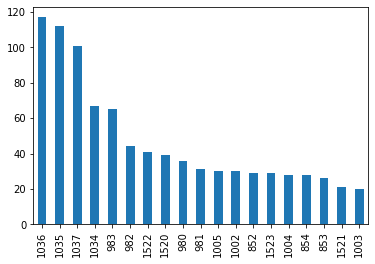

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

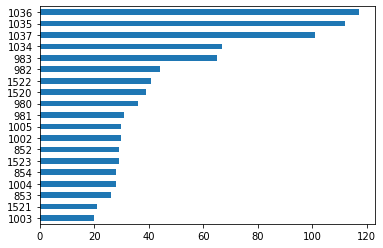

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

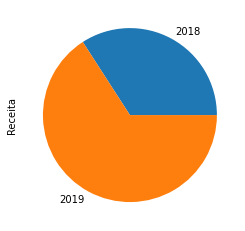

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [12]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

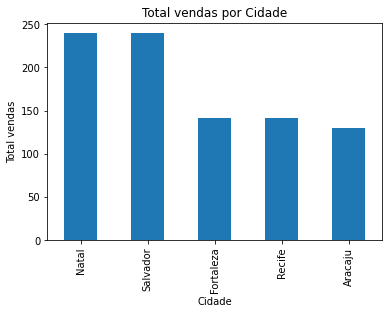

In [13]:
#Adicionando um título e alterando o nome dos eixo
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

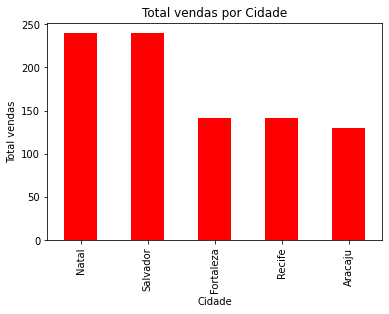

In [14]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [15]:
#Alterando o estilo
plt.style.use("ggplot")

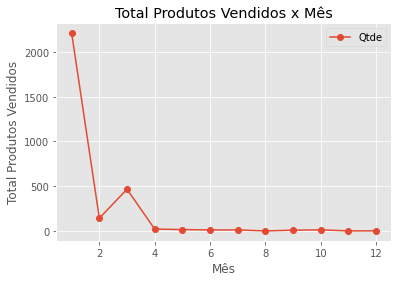

In [23]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [22]:
#Selecionando apenas as vendas de 2019
df_2019 = df(df["Ano_Venda"] == 2019)

TypeError: ignored

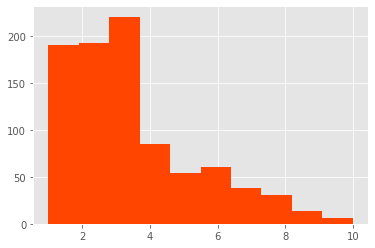

In [27]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

In [29]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"],y = df_2019["Receita"]);

NameError: ignored

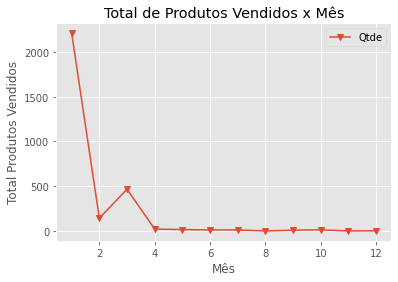

In [30]:
#Salvando em .png
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês", marker = "v")
plt.title("Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("gráfico TotalProdVendidos.png")